In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('kr2/restaurants.csv', sep = ',')
df.head(10)

,vendor_id,chain_id,city_name,specialisation,successful_orders,fail_orders,reorders
0,28957,20633,Архангельск,Супы,0.0,2.0,0.0
1,37381,27399,Архангельск,Пироги,0.0,0.0,0.0
2,28703,20431,Архангельск,Суши,111.0,3.0,0.0
3,37382,27399,Архангельск,Пироги,1.0,0.0,0.0
4,36877,27151,Архангельск,Бургеры,22.0,2.0,0.0
5,37650,27579,Архангельск,Суши,3.0,0.0,0.0
6,37127,27250,Астрахань,Суши,55.0,5.0,6.0
7,28476,20266,Астрахань,Суши,342.0,13.0,14.0
8,28478,20266,Астрахань,Суши,194.0,1.0,7.0
9,34127,25077,Астрахань,Пицца,136.0,4.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 7 columns):
vendor_id            784 non-null int64
chain_id             784 non-null int64
city_name            784 non-null object
specialisation       784 non-null object
successful_orders    784 non-null float64
fail_orders          784 non-null float64
reorders             784 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 43.0+ KB


In [5]:
df.shape[0]

784

In [6]:
df.shape[1]

7

In [7]:
df.describe(include=['object'])

,city_name,specialisation
count,784,784
unique,63,27
top,Ярославль,Суши
freq,14,329


In [8]:
(df['specialisation'] == "Рыба").value_counts()

False    754
True      30
Name: specialisation, dtype: int64

In [9]:
df.describe()

,vendor_id,chain_id,successful_orders,fail_orders,reorders
count,784.000000,784.000000,784.000000,784.000000,784.000000
mean,28054.003827,19386.003827,115.344388,2.576531,2.256378
std,9705.712916,7942.891996,176.792621,5.361445,5.374062
min,1847.000000,872.000000,0.000000,0.000000,0.000000
25%,22165.250000,13973.250000,14.750000,0.000000,0.000000
50%,30821.500000,20972.000000,53.500000,1.000000,1.000000
75%,36508.000000,26811.250000,142.250000,3.000000,2.000000
max,37926.000000,27791.000000,1644.000000,70.000000,65.000000


In [10]:
round(df['successful_orders'].mean(),0)

115.0

In [11]:
df.city_name.value_counts()[-1:]

Ханты-Мансийск    2
Name: city_name, dtype: int64

In [12]:
df[df['fail_orders']>20].shape[0]

10

In [13]:
pd.crosstab(df['fail_orders']>20, df['successful_orders']<500)

successful_orders,False,True
fail_orders,,
False,19,755
True,5,5


In [14]:
df[df['specialisation'] == 'Выпечка']['successful_orders'].mean()

12.8

In [15]:
so = df.groupby(by = 'specialisation')['successful_orders'].sum()
fo = df.groupby(by = 'specialisation')['fail_orders'].sum()
ro = df.groupby(by = 'specialisation')['reorders'].sum()
m = (fo / (so+fo+ro))
m.max()
m[(m == m.max())]

specialisation
Вегетарианское меню    0.304348
dtype: float64

In [16]:
df[df['specialisation'] == 'Бургеры']['successful_orders'].max()

506.0

In [17]:
df[(df.city_name == 'Белгород') & (df.specialisation == 'Суши')]['successful_orders'].mean()

328.0

In [18]:
df1 = pd.read_csv('kr2/restaurant_scores.csv', sep = ',')
df1.tail()

,id,model_score
37717,37951,0.754494
37718,37952,0.662785
37719,37953,0.509935
37720,37954,0.417669
37721,37955,0.031183


In [19]:
df2 = pd.merge(df, df1, left_on='vendor_id', right_on='id')
df2

,vendor_id,chain_id,city_name,specialisation,successful_orders,fail_orders,reorders,id,model_score
0,28957,20633,Архангельск,Супы,0.0,2.0,0.0,28957,0.421871
1,37381,27399,Архангельск,Пироги,0.0,0.0,0.0,37381,0.386503
2,28703,20431,Архангельск,Суши,111.0,3.0,0.0,28703,0.664808
3,37382,27399,Архангельск,Пироги,1.0,0.0,0.0,37382,0.838883
4,36877,27151,Архангельск,Бургеры,22.0,2.0,0.0,36877,0.176469
5,37650,27579,Архангельск,Суши,3.0,0.0,0.0,37650,0.610480
6,37127,27250,Астрахань,Суши,55.0,5.0,6.0,37127,0.494957
7,28476,20266,Астрахань,Суши,342.0,13.0,14.0,28476,0.430523
8,28478,20266,Астрахань,Суши,194.0,1.0,7.0,28478,0.390875
9,34127,25077,Астрахань,Пицца,136.0,4.0,1.0,34127,0.715211


In [20]:
res = df2[df2['chain_id'] == 27399]['model_score'].mean()
round(res,2)

0.61

In [21]:
import matplotlib.pyplot as plt

x = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]

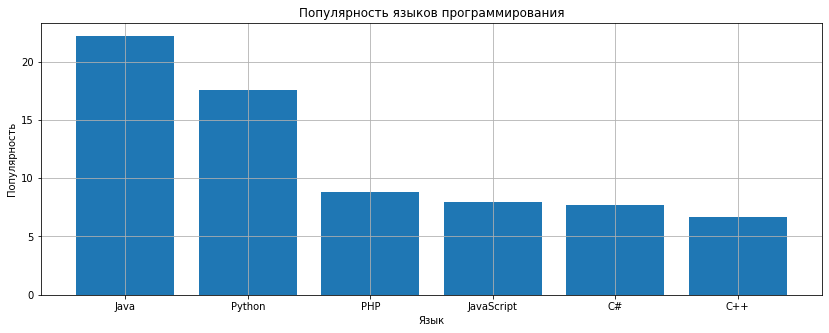

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(14,5))
axes.bar(x,popularity)
axes.set_xlabel('Язык')
axes.set_ylabel('Популярность')
axes.set_title('Популярность языков программирования')
plt.grid()

In [23]:
import seaborn as sns
partizan = pd.read_excel('mail_курс/Лекция 2_МАИ_0710/files/lesson_2/partizan.xlsx')
partizan.tail()

,Unnamed: 0,chain_name,lon,lat,orders
30,30,Zvjezda,37.718238,55.794452,4
31,31,Amazonija,37.748619,55.791744,5
32,32,Spasibo,37.728523,55.818736,0
33,33,Gurman_msk,37.734201,55.783089,0
34,34,Super_Papas,37.751179,55.780795,0


[Text(0.5, 0, 'Заказы')]

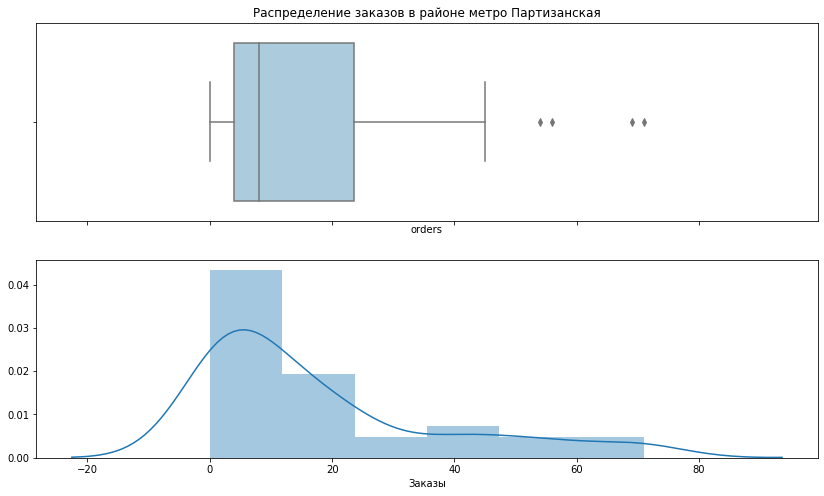

In [24]:
fig, (ax_box, ax_hist) = plt.subplots(2, figsize=(14,8), sharex=True)
sns.boxplot(partizan["orders"], ax=ax_box, palette="Paired", saturation=0.8)
sns.distplot(partizan["orders"], ax=ax_hist)
ax_box.set_title('Распределение заказов в районе метро Партизанская')
ax_box.set(xlabel='orders')
ax_hist.set(xlabel='Заказы')